In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.4 MB/s eta 0:00:00


In [ ]:
import re
import os
import pandas as pd
import spacy
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

In [ ]:
import kagglehub
path = kagglehub.dataset_download("omkarsabnis/yelp-reviews-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.49M/3.49M [00:00<00:00, 39.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1


In [ ]:
import random

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

dataset_dir = "/root/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1"

for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        dataset_path = os.path.join(dataset_dir, filename)
        break
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset directory.")

df = pd.read_csv(dataset_path)

stop_words = set(stopwords.words('english'))

random_index = random.randint(0, len(df) - 1)
random_text = df.iloc[random_index]['text']

print(f"### SELECTED RANDOM TEXT (Index #{random_index}) ###\n")
print(random_text, "\n")

### WORD TOKENIZATION ###
spacy_tokens = [token.text for token in nlp(random_text)]
nltk_tokens = word_tokenize(random_text)

print("### 1. WORD TOKENIZE ###\n")
print("[SPACY OUTPUT]:")
print(spacy_tokens, "\n")
print("[NLTK OUTPUT]:")
print(nltk_tokens, "\n")

### SENTENCE TOKENIZATION ###
spacy_sentences = [sent.text for sent in nlp(random_text).sents]
nltk_sentences = sent_tokenize(random_text)

print("### 2. SENTENCE TOKENIZE ###\n")
print("[SPACY OUTPUT]:")
print(spacy_sentences, "\n")
print("[NLTK OUTPUT]:")
print(nltk_sentences, "\n")

### STOPWORDS REMOVAL ###
spacy_filtered_tokens = [token.text if token.text.lower() not in stop_words else "(removed)" for token in nlp(random_text)]
nltk_filtered_tokens = ["(removed)" if word.lower() in stop_words else word for word in nltk_tokens]

print("### 3. STOP WORDS REMOVAL ###\n")
print("[SPACY OUTPUT]:")
print(spacy_filtered_tokens, "\n")
print("[NLTK OUTPUT]:")
print(nltk_filtered_tokens, "\n")

### LEMMATIZATION ###
spacy_lemmas = [token.lemma_ for token in nlp(random_text)]
nltk_lemmas = nltk_tokens  # (NLTK требует WordNetLemmatizer, можно добавить отдельно)

print("### 4. LEMMATIZATION ###\n")
print("[SPACY OUTPUT]:")
print(spacy_lemmas, "\n")
print("[NLTK OUTPUT]:")
print(nltk_lemmas, "\n")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### SELECTED RANDOM TEXT (Index #1475) ###

LOVE LOVE LOVE the ambience outside! Love the fact the restaurant is in a old style bungalow and the patio is lit with string lights.

I went there for the first time last night 15min before close and I dont know if they usually have music or not..but if they don't, they need it. 

Food was great but nothing to die for. 

### 1. WORD TOKENIZE ###

[SPACY OUTPUT]:
['LOVE', 'LOVE', 'LOVE', 'the', 'ambience', 'outside', '!', 'Love', 'the', 'fact', 'the', 'restaurant', 'is', 'in', 'a', 'old', 'style', 'bungalow', 'and', 'the', 'patio', 'is', 'lit', 'with', 'string', 'lights', '.', '\n\n', 'I', 'went', 'there', 'for', 'the', 'first', 'time', 'last', 'night', '15min', 'before', 'close', 'and', 'I', 'do', 'nt', 'know', 'if', 'they', 'usually', 'have', 'music', 'or', 'not', '..', 'but', 'if', 'they', 'do', "n't", ',', 'they', 'need', 'it', '.', '\n\n', 'Food', 'was', 'great', 'but', 'nothing', 'to', 'die', 'for', '.'] 

[NLTK OUTPUT]:
['LOVE', 'LOVE'

In [ ]:
import gensim
from gensim.models import Word2Vec, FastText
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
# Text Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    tokens = word_tokenize(text.lower())  # Tokenization & lowercasing
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Preprocess the dataset
df['tokens'] = df['text'].apply(preprocess_text)

In [ ]:
# Train Word2Vec (CBOW & Skip-gram)
cbow_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=5, sg=0, workers=4)  # CBOW
skipgram_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=5, sg=1, workers=4)  # Skip-gram

In [ ]:
# Train FastText
fasttext_model = FastText(sentences=df['tokens'], vector_size=100, window=5, min_count=5, sg=1, workers=4)  # Skip-gram FastText

In [ ]:
# Train GloVe using gensim's Word2Vec wrapper
corpus = df['tokens'].tolist()
glove_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=0, workers=4)

In [ ]:
# Function to compute sentence embedding
def get_sentence_vector(model, sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

In [ ]:
random_index2 = random.randint(0, len(df) - 1)
while random_index2 == random_index:
    random_index2 = random.randint(0, len(df) - 1)
# Accessing the correct column 'text' instead of 'review'
sentence2 = preprocess_text(df.iloc[random_index2]['text'])

In [ ]:
sentence1 = preprocess_text(df.iloc[random_index]['text']) # Define sentence1 similar to how sentence2 was defined

# Compute sentence vectors
cbow_vec1, cbow_vec2 = get_sentence_vector(cbow_model, sentence1), get_sentence_vector(cbow_model, sentence2)
skipgram_vec1, skipgram_vec2 = get_sentence_vector(skipgram_model, sentence1), get_sentence_vector(skipgram_model, sentence2)
fasttext_vec1, fasttext_vec2 = get_sentence_vector(fasttext_model, sentence1), get_sentence_vector(fasttext_model, sentence2)
glove_vec1, glove_vec2 = get_sentence_vector(glove_model, sentence1), get_sentence_vector(glove_model, sentence2)

In [ ]:
# Compute cosine similarity
def cosine_sim(vec1, vec2):
    return cosine_similarity([vec1], [vec2])[0][0]

cbow_similarity = cosine_sim(cbow_vec1, cbow_vec2)
skipgram_similarity = cosine_sim(skipgram_vec1, skipgram_vec2)
fasttext_similarity = cosine_sim(fasttext_vec1, fasttext_vec2)
glove_similarity = cosine_sim(glove_vec1, glove_vec2)

In [ ]:
print("Cosine Similarity:")
print(f"CBOW Model: {cbow_similarity:.4f}")
print(f"Skip-gram Model: {skipgram_similarity:.4f}")
print(f"FastText Model: {fasttext_similarity:.4f}")
print(f"GloVe Model: {glove_similarity:.4f}")

Cosine Similarity:
CBOW Model: 0.8726
Skip-gram Model: 0.8965
FastText Model: 0.9316
GloVe Model: 0.8670


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Function to visualize embeddings using PCA or t-SNE
def visualize_embeddings(model, method='pca', num_words=100, title='Word Embeddings'):
    words = list(model.wv.index_to_key)[:num_words]
    word_vectors = np.array([model.wv[word] for word in words])

    if method == 'pca':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42)

    reduced_vectors = reducer.fit_transform(word_vectors)

    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], marker='o')
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=9)
    plt.title(f'{title} Visualization using {method.upper()}')
    plt.show()

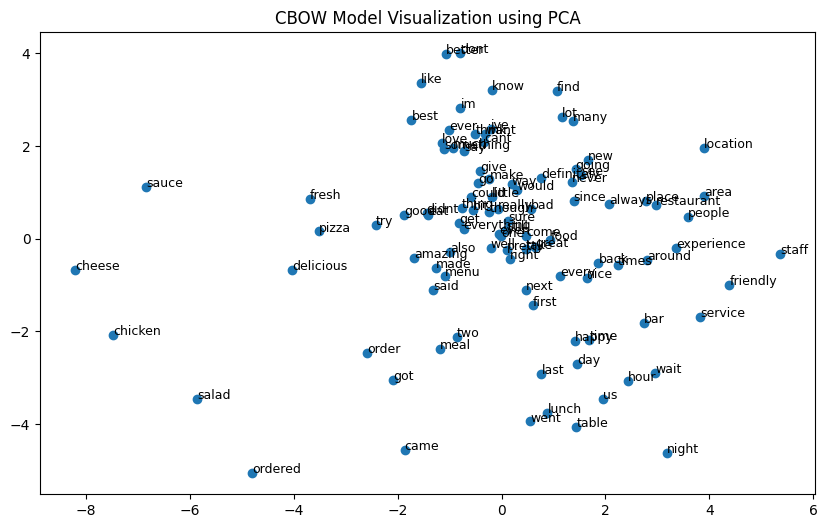

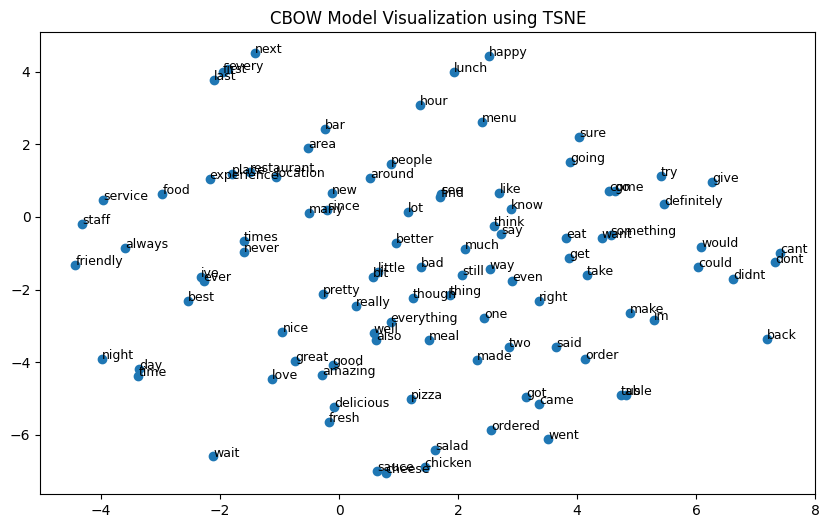

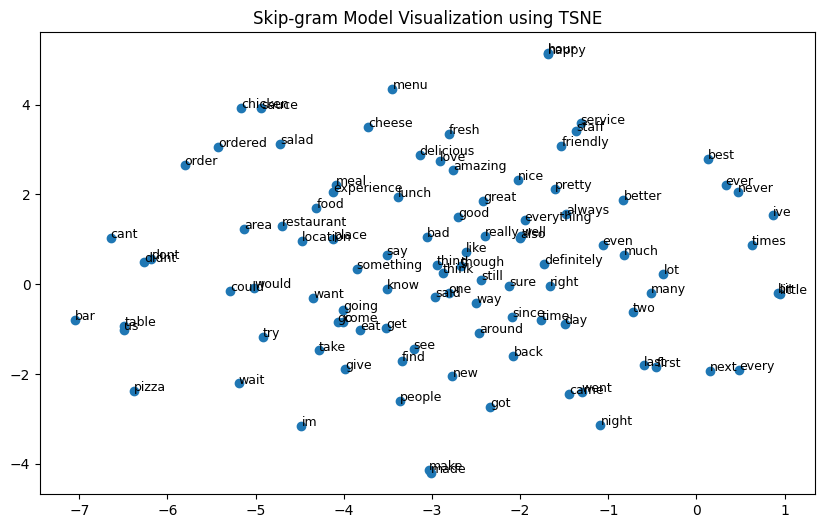

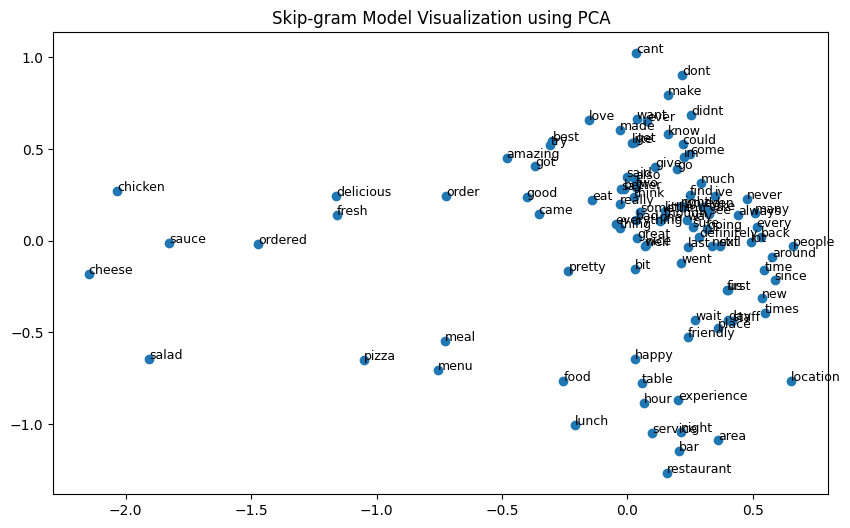

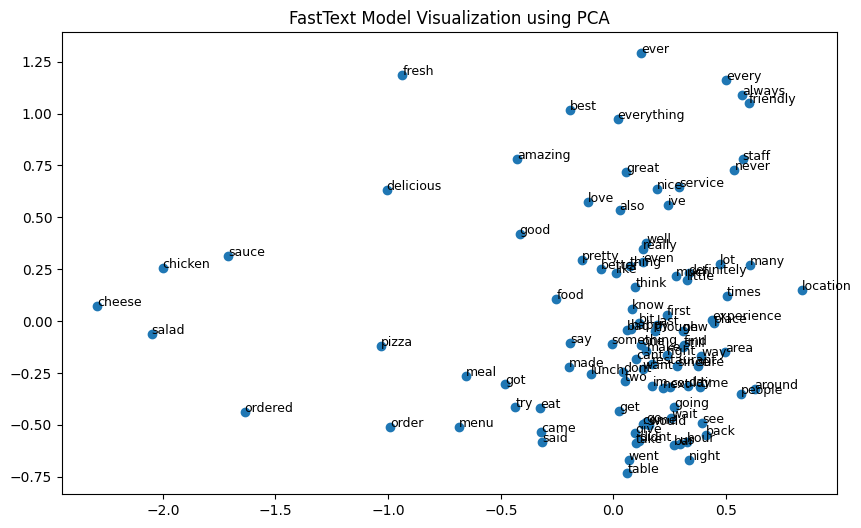

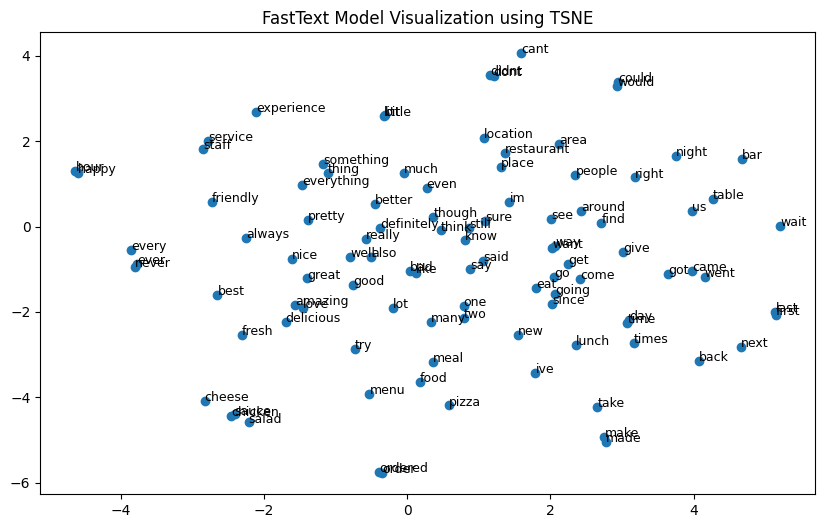

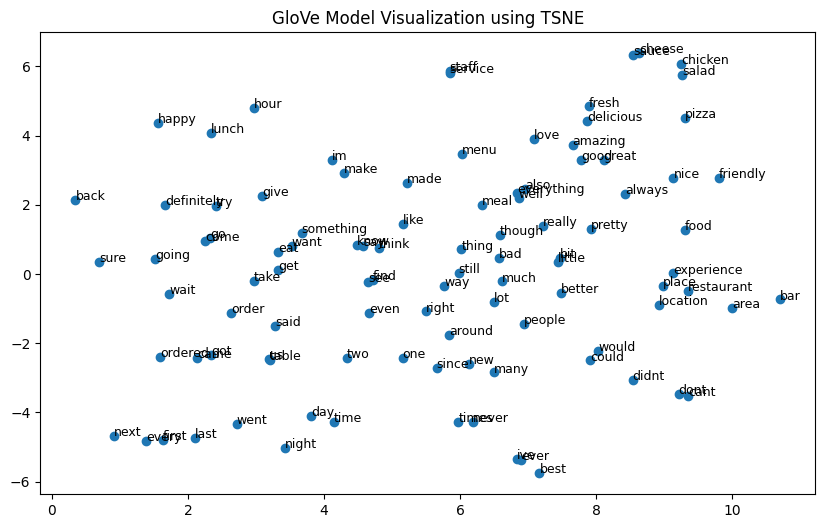

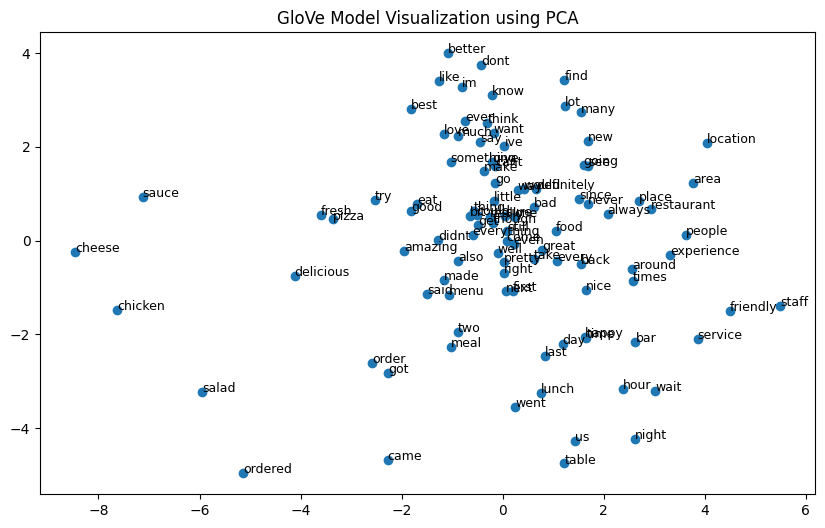

In [ ]:
visualize_embeddings(cbow_model, method='pca', title='CBOW Model')
visualize_embeddings(cbow_model, method='tsne', title='CBOW Model')

visualize_embeddings(skipgram_model, method='tsne', title='Skip-gram Model')
visualize_embeddings(skipgram_model, method='pca', title='Skip-gram Model')

visualize_embeddings(fasttext_model, method='pca', title='FastText Model')
visualize_embeddings(fasttext_model, method='tsne', title='FastText Model')

visualize_embeddings(glove_model, method='tsne', title='GloVe Model')
visualize_embeddings(glove_model, method='pca', title='GloVe Model')

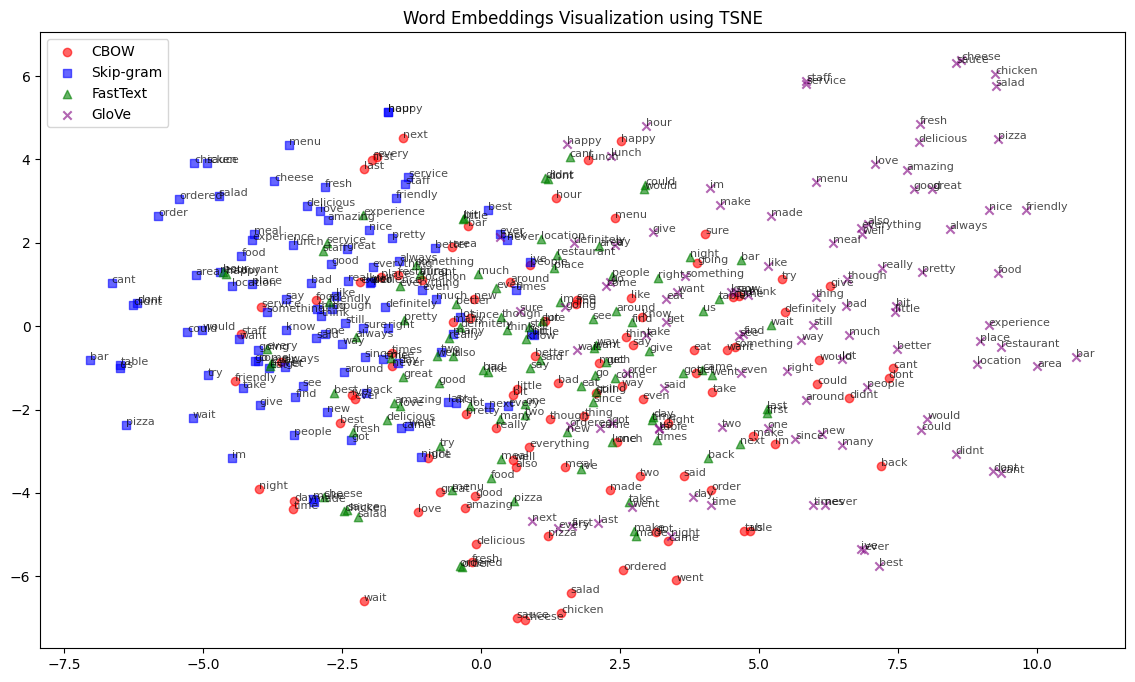

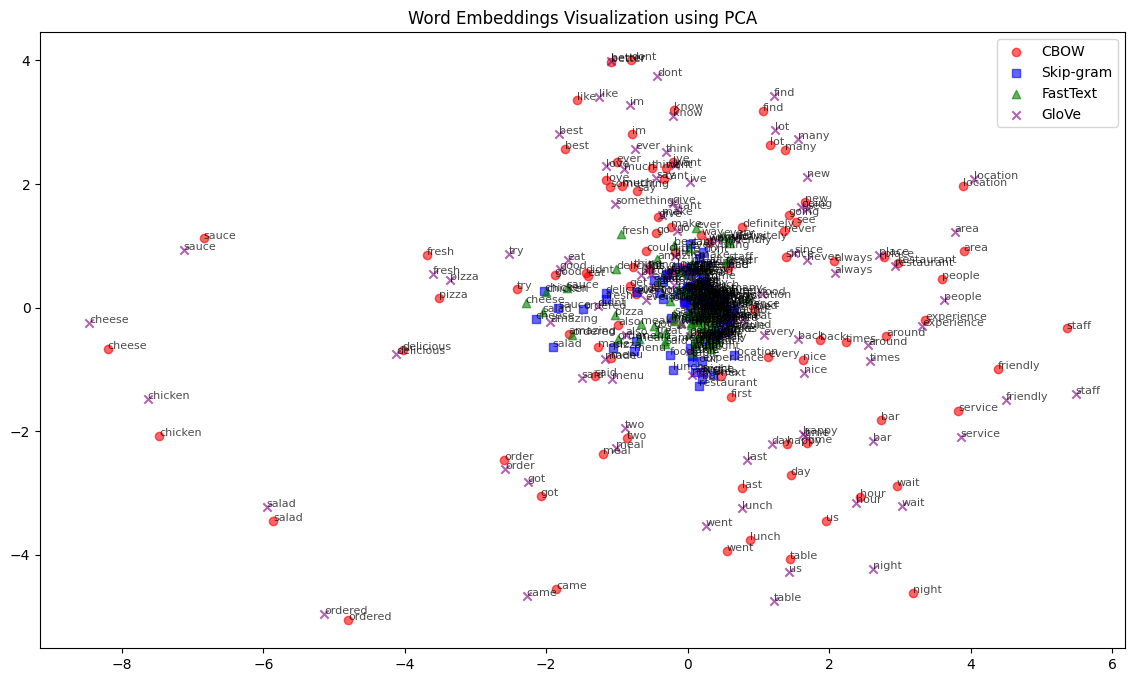

In [ ]:
# Function to visualize all embeddings on one graph using PCA or t-SNE
def visualize_all_embeddings(models, method='pca', num_words=100):
    plt.figure(figsize=(14, 8))
    colors = ['red', 'blue', 'green', 'purple']
    labels = ['CBOW', 'Skip-gram', 'FastText', 'GloVe']
    markers = ['o', 's', '^', 'x']

    for i, (model, color, label, marker) in enumerate(zip(models, colors, labels, markers)):
        words = list(model.wv.index_to_key)[:num_words]
        word_vectors = np.array([model.wv[word] for word in words])

        if method == 'pca':
            reducer = PCA(n_components=2)
        else:
            reducer = TSNE(n_components=2, random_state=42)

        reduced_vectors = reducer.fit_transform(word_vectors)

        plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color=color, label=label, marker=marker, alpha=0.6)

        for j, word in enumerate(words):
            plt.annotate(word, (reduced_vectors[j, 0], reduced_vectors[j, 1]), fontsize=8, alpha=0.7)

    plt.title(f'Word Embeddings Visualization using {method.upper()}')
    plt.legend()
    plt.show()

visualize_all_embeddings([cbow_model, skipgram_model, fasttext_model, glove_model], method='tsne')
visualize_all_embeddings([cbow_model, skipgram_model, fasttext_model, glove_model], method='pca')

In [ ]:
# Function to compare embeddings similarity
def compare_embeddings_random(models, num_words=5):
    random_words = random.sample(list(cbow_model.wv.index_to_key), num_words)
    for word in random_words:
        print(f"\n### Similar words for: {word} ###")
        for model, label in zip(models, ['CBOW', 'Skip-gram', 'FastText', 'GloVe']):
            if word in model.wv:
                similar_words = model.wv.most_similar(word, topn=5)
                print(f"{label} Model: {similar_words}")
            else:
                print(f"{label} Model: Word not in vocabulary")

compare_embeddings_random([cbow_model, skipgram_model, fasttext_model, glove_model])


### Similar words for: bustling ###
CBOW Model: [('occupied', 0.9782677292823792), ('suites', 0.9781655669212341), ('reserved', 0.9753276705741882), ('entered', 0.9740501642227173), ('entertained', 0.9729386568069458)]
Skip-gram Model: [('singing', 0.9444127082824707), ('supper', 0.9440598487854004), ('casey', 0.9435288906097412), ('majerles', 0.9386857748031616), ('lanes', 0.9378625750541687)]
FastText Model: [('sleeping', 0.9477498531341553), ('crawling', 0.945722222328186), ('drooling', 0.9407857656478882), ('piercing', 0.9390982985496521), ('stomping', 0.9389072060585022)]
GloVe Model: [('catching', 0.9804959893226624), ('ac', 0.9775858521461487), ('stuck', 0.9766859412193298), ('cardinals', 0.9758172035217285), ('screaming', 0.9755728840827942)]

### Similar words for: importance ###
CBOW Model: [('build', 0.9891252517700195), ('land', 0.9854859709739685), ('programs', 0.9851077198982239), ('ancient', 0.983308732509613), ('supplies', 0.9832919239997864)]
Skip-gram Model: [('strap

**Task 2: Building Recurrent Neural Networks for Sentiment Analysis**

In [ ]:
!pip install torch torchvision torchaudio torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
pip install torchtext==0.15.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.utils import get_tokenizer
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import os

dataset_dir = "/root/.cache/kagglehub/datasets/omkarsabnis/yelp-reviews-dataset/versions/1"

for filename in os.listdir(dataset_dir):
    if filename.endswith(".csv"):
        csv_file = os.path.join(dataset_dir, filename)
        break
else:
    raise FileNotFoundError("No CSV file found in the downloaded dataset directory.")

df = pd.read_csv(csv_file)

In [ ]:
df = df[['text', 'stars']]
df = df[df['stars'] != 3]
df['label'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)  # 1 = позитив, 0 = негатив

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, random_state=42)

In [ ]:
tokenizer = get_tokenizer("basic_english")

In [ ]:
# Function for generating a vocabulary
def yield_tokens(texts):
    for text in texts:
        yield tokenizer(text)

In [ ]:
# Create a vocabulary based on training data
vocab = build_vocab_from_iterator(yield_tokens(train_texts), specials=["<unk>", "<pad>"])
vocab.set_default_index(vocab["<unk>"])

In [ ]:
def text_pipeline(text):
    return vocab(tokenizer(text))

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(text_pipeline(self.texts[idx]), dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

In [ ]:
# Creating Dataset & DataLoader
train_dataset = SentimentDataset(train_texts, train_labels)
test_dataset = SentimentDataset(test_texts, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

vocab_size = len(vocab)
print(f"Размер словаря: {vocab_size}")

Размер словаря: 28761


In [ ]:
# Построение RNN модели
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.rnn(x)
        return self.fc(hidden.squeeze(0))

In [ ]:
# Инициализация модели
embed_dim = 100
hidden_dim = 128
output_dim = 2
model = RNNModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

Using device: cpu


In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Model train
epochs = 5
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for texts, labels in train_loader:
        texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]
        labels = torch.tensor(labels, dtype=torch.long).to(device)

        optimizer.zero_grad()
        outputs = model(torch.nn.utils.rnn.pad_sequence(texts, batch_first=True))
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()
        total += labels.size(0)

    train_losses.append(total_loss / len(train_loader))
    train_accuracies.append(correct / total)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}")

<ipython-input-21-38aad5bf6f30>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]


Epoch 1/5, Loss: 0.5044, Accuracy: 0.8032
Epoch 2/5, Loss: 0.4920, Accuracy: 0.8059
Epoch 3/5, Loss: 0.4909, Accuracy: 0.8075
Epoch 4/5, Loss: 0.4871, Accuracy: 0.8106
Epoch 5/5, Loss: 0.4932, Accuracy: 0.8066


In [ ]:
# Function for evaluating the model on test data
def evaluate(model, test_loader):
    model.eval()  # Set evaluation mode (no gradient updates)
    correct = 0
    total = 0
    test_loss = 0

    with torch.no_grad():  # Disable gradients
        for texts, labels in test_loader:
            texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]
            labels = torch.tensor(labels, dtype=torch.long).to(device)

            outputs = model(torch.nn.utils.rnn.pad_sequence(texts, batch_first=True))
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            predictions = outputs.argmax(1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    avg_test_loss = test_loss / len(test_loader)
    test_accuracy = correct / total

    print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    return avg_test_loss, test_accuracy

# Run model evaluation
test_loss, test_accuracy = evaluate(model, test_loader)

<ipython-input-22-9a6f97c096b7>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]


Test Loss: 0.5039, Test Accuracy: 0.7957


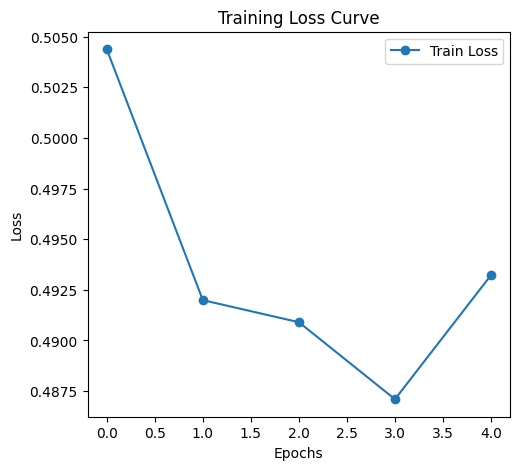

In [ ]:
# Visualization of loss and accuracy (Train & Test Accuracy)
plt.figure(figsize=(12, 5))

# Loss graph
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_losses, marker='o', linestyle='-', label="Train Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()

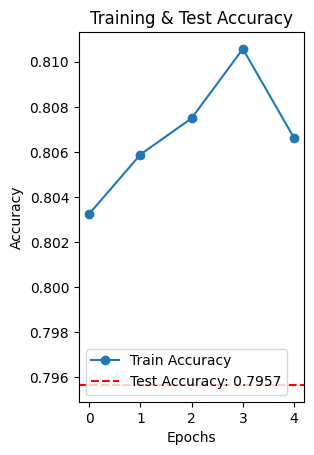

In [ ]:
# Accuracy graph
plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracies, marker='o', linestyle='-', label="Train Accuracy")
plt.axhline(y=test_accuracy, color='r', linestyle='--', label=f"Test Accuracy: {test_accuracy:.4f}")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Test Accuracy")
plt.legend()

plt.show()

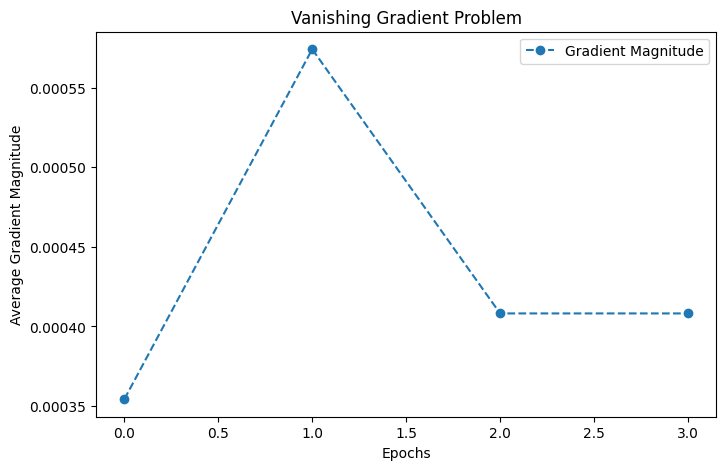

In [ ]:
# Vis. of the vanishing gradient
gradients = []
for name, param in model.named_parameters():
    if param.requires_grad and "rnn" in name:  # Gradients only for RNN
        gradients.append(param.grad.abs().mean().item())

plt.figure(figsize=(8, 5))
plt.plot(gradients, marker='o', linestyle='--', label="Gradient Magnitude")
plt.xlabel("Epochs")
plt.ylabel("Average Gradient Magnitude")
plt.title("Vanishing Gradient Problem")
plt.legend()
plt.show()

**Task 3: Implementing LSTM and GRU for Text Classification**

In [ ]:
import time

In [ ]:
# Creating LSTM and GRU models
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, _) = self.lstm(x)
        return self.fc(hidden.squeeze(0))

class GRUModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(GRUModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        output, hidden = self.gru(x)
        return self.fc(hidden.squeeze(0))

In [ ]:
# Model initialization
embed_dim = 100
hidden_dim = 128
output_dim = 2
lstm_model = LSTMModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)
gru_model = GRUModel(vocab_size, embed_dim, hidden_dim, output_dim).to(device)

In [ ]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_lstm = optim.Adam(lstm_model.parameters(), lr=0.001)
optimizer_gru = optim.Adam(gru_model.parameters(), lr=0.001)

In [ ]:
# Training function
def train_model(model, optimizer, train_loader, epochs=5):
    train_losses, train_accuracies = [], []
    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        total_loss, correct, total = 0, 0, 0

        for texts, labels in train_loader:
            texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]
            labels = torch.tensor(labels, dtype=torch.long).to(device)

            optimizer.zero_grad()
            outputs = model(torch.nn.utils.rnn.pad_sequence(texts, batch_first=True))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(correct / total)
        print(f"Epoch {epoch+1}, Loss: {train_losses[-1]:.4f}, Accuracy: {train_accuracies[-1]:.4f}")

    elapsed_time = time.time() - start_time
    return train_losses, train_accuracies, elapsed_time

In [ ]:
# Training LSTM and GRU
lstm_losses, lstm_acc, lstm_time = train_model(lstm_model, optimizer_lstm, train_loader)
gru_losses, gru_acc, gru_time = train_model(gru_model, optimizer_gru, train_loader)

<ipython-input-31-fd389de97ef8>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(t, dtype=torch.long).to(device) for t in texts]


Epoch 1, Loss: 0.5002, Accuracy: 0.8022
Epoch 2, Loss: 0.4918, Accuracy: 0.8052
Epoch 3, Loss: 0.4899, Accuracy: 0.8073
Epoch 4, Loss: 0.4872, Accuracy: 0.8091
Epoch 5, Loss: 0.4858, Accuracy: 0.8103
Epoch 1, Loss: 0.5040, Accuracy: 0.8019
Epoch 2, Loss: 0.4891, Accuracy: 0.8063
Epoch 3, Loss: 0.4273, Accuracy: 0.8128
Epoch 4, Loss: 0.3013, Accuracy: 0.8748
Epoch 5, Loss: 0.1869, Accuracy: 0.9277


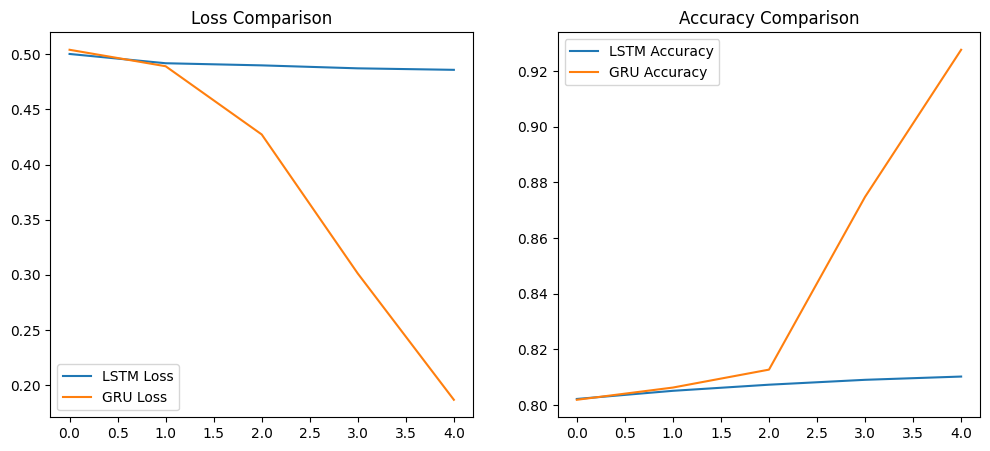

In [ ]:
# Model comparison (Loss & Accuracy)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(lstm_losses, label="LSTM Loss")
plt.plot(gru_losses, label="GRU Loss")
plt.legend()
plt.title("Loss Comparison")

plt.subplot(1, 2, 2)
plt.plot(lstm_acc, label="LSTM Accuracy")
plt.plot(gru_acc, label="GRU Accuracy")
plt.legend()
plt.title("Accuracy Comparison")

plt.show()

**Task 5: Improving Performance with Bidirectional LSTM**

In [2]:
!pip install tensorflow

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# Filter the required columns
corpus = df['text'].astype(str).tolist()  # Convert reviews into a list of strings

# Convert star ratings into binary labels (e.g., 1-2 stars -> 0, 4-5 -> 1, exclude 3-star ratings)
df = df[df['stars'] != 3]  # Убираем нейтральные отзывы
df['label'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)

labels = df['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1  # +1 для токена паддинга

# Convert text into numerical sequences
sequences = tokenizer.texts_to_sequences(df['text'].astype(str).tolist())

# Pad sequences to the same length
max_sequence_len = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='post')

<ipython-input-6-305d6dfc85ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(sequences, df['label'].tolist(), test_size=0.2, random_state=42)

y_train = np.array(y_train)
y_test = np.array(y_test)

LSTM model

In [8]:
# hyperparameters
embedding_dim = 16
lstm_units = 32

# Standard LSTM model
model_lstm = Sequential([
    Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len),
    LSTM(lstm_units),
    Dense(1, activation='sigmoid')
])

# Model compilation
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
model_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
214/214 - 11s - 53ms/step - accuracy: 0.8056 - loss: 0.5019 - val_accuracy: 0.7963 - val_loss: 0.5064
Epoch 2/10
214/214 - 6s - 27ms/step - accuracy: 0.8056 - loss: 0.4938 - val_accuracy: 0.7963 - val_loss: 0.5057
Epoch 3/10
214/214 - 6s - 30ms/step - accuracy: 0.8057 - loss: 0.4931 - val_accuracy: 0.7963 - val_loss: 0.5080
Epoch 4/10
214/214 - 10s - 48ms/step - accuracy: 0.8057 - loss: 0.4937 - val_accuracy: 0.7963 - val_loss: 0.5079
Epoch 5/10
214/214 - 10s - 48ms/step - accuracy: 0.8057 - loss: 0.4934 - val_accuracy: 0.7963 - val_loss: 0.5057
Epoch 6/10
214/214 - 10s - 45ms/step - accuracy: 0.8057 - loss: 0.4932 - val_accuracy: 0.7963 - val_loss: 0.5068
Epoch 7/10
214/214 - 11s - 50ms/step - accuracy: 0.8057 - loss: 0.4929 - val_accuracy: 0.7963 - val_loss: 0.5059
Epoch 8/10
214/214 - 10s - 45ms/step - accuracy: 0.8057 - loss: 0.4929 - val_accuracy: 0.7963 - val_loss: 0.5067
Epoch 9/10
214/214 - 11s - 49ms/step - accuracy: 0.8057 - loss: 0.4926 - val_accuracy: 0.7963 - va

Bidirectional LSTM

In [9]:
from tensorflow.keras.layers import Bidirectional

In [10]:
# Bidirectional LSTM model
model_bi_lstm = Sequential([
    Embedding(input_dim=total_words, output_dim=embedding_dim, input_length=max_sequence_len),
    Bidirectional(LSTM(lstm_units)),
    Dense(1, activation='sigmoid')
])

# Model compilation
model_bi_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model training
model_bi_lstm.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
214/214 - 15s - 71ms/step - accuracy: 0.8075 - loss: 0.4729 - val_accuracy: 0.7963 - val_loss: 0.4486
Epoch 2/10
214/214 - 11s - 51ms/step - accuracy: 0.8690 - loss: 0.3033 - val_accuracy: 0.8899 - val_loss: 0.2748
Epoch 3/10
214/214 - 21s - 97ms/step - accuracy: 0.9407 - loss: 0.1732 - val_accuracy: 0.8870 - val_loss: 0.3511
Epoch 4/10
214/214 - 20s - 95ms/step - accuracy: 0.9674 - loss: 0.1030 - val_accuracy: 0.8911 - val_loss: 0.3083
Epoch 5/10
214/214 - 11s - 52ms/step - accuracy: 0.9627 - loss: 0.1044 - val_accuracy: 0.8858 - val_loss: 0.3258
Epoch 6/10
214/214 - 20s - 96ms/step - accuracy: 0.9914 - loss: 0.0336 - val_accuracy: 0.9011 - val_loss: 0.3832
Epoch 7/10
214/214 - 11s - 52ms/step - accuracy: 0.9915 - loss: 0.0323 - val_accuracy: 0.9022 - val_loss: 0.3979
Epoch 8/10
214/214 - 11s - 52ms/step - accuracy: 0.9937 - loss: 0.0223 - val_accuracy: 0.8940 - val_loss: 0.4255
Epoch 9/10
214/214 - 21s - 96ms/step - accuracy: 0.9956 - loss: 0.0169 - val_accuracy: 0.8934 - 

Models comparison

In [11]:
# Model evaluation
loss_lstm, acc_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
loss_bi_lstm, acc_bi_lstm = model_bi_lstm.evaluate(X_test, y_test, verbose=0)

print(f"Standard LSTM Accuracy: {acc_lstm:.4f}, Loss: {loss_lstm:.4f}")
print(f"Bidirectional LSTM Accuracy: {acc_bi_lstm:.4f}, Loss: {loss_bi_lstm:.4f}")

Standard LSTM Accuracy: 0.7963, Loss: 0.5058
Bidirectional LSTM Accuracy: 0.8964, Loss: 0.5177


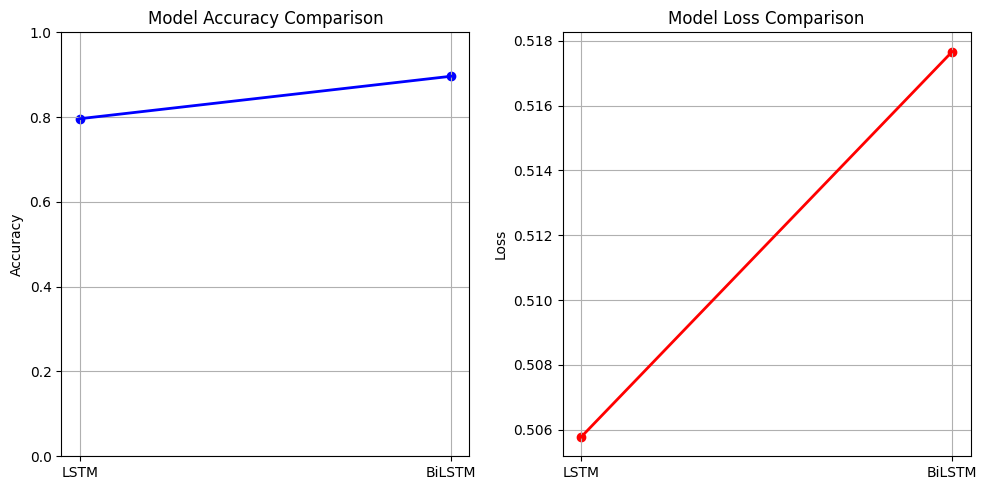

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

models = ["LSTM", "BiLSTM"]
x_values = np.array([0, 1])
accuracies = np.array([acc_lstm, acc_bi_lstm])
losses = np.array([loss_lstm, loss_bi_lstm])

x_smooth = np.linspace(x_values.min(), x_values.max(), 300)

accuracy_spline = make_interp_spline(x_values, accuracies, k=1)
loss_spline = make_interp_spline(x_values, losses, k=1)

plt.figure(figsize=(10, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(x_smooth, accuracy_spline(x_smooth), color='blue', linewidth=2)
plt.scatter(x_values, accuracies, color='blue', marker='o', label='Accuracy')
plt.xticks(x_values, models)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(True)

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(x_smooth, loss_spline(x_smooth), color='red', linewidth=2)
plt.scatter(x_values, losses, color='red', marker='o', label='Loss')
plt.xticks(x_values, models)
plt.ylabel("Loss")
plt.title("Model Loss Comparison")
plt.grid(True)

plt.tight_layout()
plt.show()